 
1. [Задание 1](#task1)

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


##  Задание 1
<a id='task1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
f = pd.read_csv('water.csv')
f

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

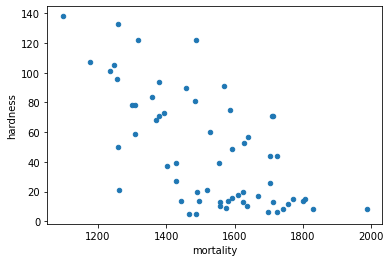

In [3]:
#Построить точечный график
f.plot(kind='scatter', x='mortality', y='hardness')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

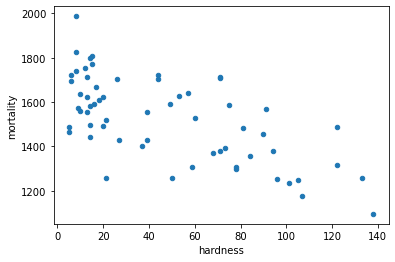

In [4]:
f.plot(kind='scatter', x='hardness', y='mortality')

In [11]:
coeff = f[['hardness','mortality']]
coeff

,hardness,mortality
0,105,1247
1,17,1668
2,5,1466
3,14,1800
4,18,1609
...,...,...
56,60,1527
57,53,1627
58,122,1486
59,81,1485


#### Коэффициент Пирсона

In [13]:
pears_coeff = np.corrcoef(f['hardness'] , f['mortality'])
print(pears_coeff)

[[ 1.         -0.65484862]
 [-0.65484862  1.        ]]


In [16]:
coeff.corr(method='pearson')

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


#### Коэффициент  Спирмана

In [15]:
coeff.corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


#### Построить модель линейной регрессии

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X = f[['hardness']]
y = f['mortality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
X_train.shape

(42, 1)

In [21]:
y_train.shape

(42,)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.coef_

array([-3.13167087])

In [24]:
model.intercept_

1668.9722977277095

In [25]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

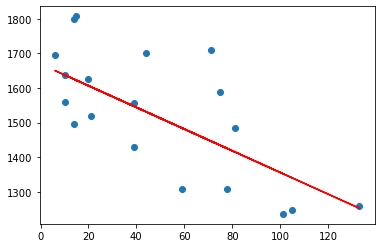

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

#### Рассчитать коэффициент детерминации


In [29]:
model.score(X_test, y_test)

0.5046490611017092

#### Вывести график остатков

In [30]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
X_const = sm.add_constant(X_train)

In [34]:
model = sm.OLS(y_train, X_const)
results = model.fit()

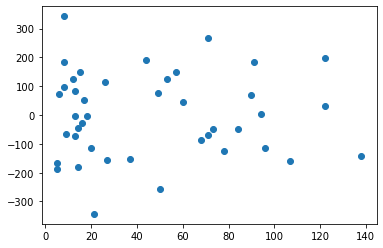

In [35]:
plt.scatter(X_const.iloc[:, 1], results.resid)